In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_excel("D:/Study material/Ineuron - internship/tourism_data.xlsx", sheet_name='Tourism')
df = dataset

In [3]:
df['TypeofContact'] = df['TypeofContact'].fillna("Self Enquiry")
def impute_age(cols):
    Age = cols[0]
    Designation = cols[1]
    
    if pd.isnull(Age):
        
        if Designation == "Executive":
            return 33
        elif Designation == "Manager":
            return 37
        elif Designation == "Senior Manager":
            return 40
        else:
            return 48
    else:
        return Age

In [4]:
df['Age'] = df[['Age','Designation']].apply(impute_age, axis=1)
df['DurationOfPitch'] = df['DurationOfPitch'].fillna(df.groupby('NumberOfPersonVisited')['DurationOfPitch'].transform('mean'))
df['NumberOfFollowups'] = df['NumberOfFollowups'].fillna(4)
df['MonthlyIncome'] = df['MonthlyIncome'].fillna(df.groupby('Designation')['MonthlyIncome'].transform('mean'))
df['PreferredPropertyStar'] = df['PreferredPropertyStar'].fillna(3)
df['NumberOfTrips'] = df['NumberOfTrips'].fillna(2)
df.dropna(axis = 0, inplace = True)
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

In [5]:
df.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,Gender,NumberOfPersonVisited,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,MonthlyIncome
count,4822.000000,4822.000000,4822.000000,4822.000000,4822.000000,4822.000000,4822.000000,4822.000000,4822.000000,4822.000000,4822.000000,4822.000000,4822.000000,4822.000000,4822.000000
mean,202438.275819,0.189341,37.334301,1.653878,15.475551,0.599336,2.902737,3.708005,3.575073,3.189755,0.291165,3.074243,0.618623,1.187267,23367.406734
std,1412.433701,0.391820,9.077384,0.916706,8.289287,0.490084,0.725764,0.999157,0.796216,1.834434,0.454347,1.366277,0.485775,0.857861,5134.974731
min,200000.000000,0.000000,18.000000,1.000000,5.000000,0.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201216.250000,0.000000,31.000000,1.000000,9.000000,0.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20237.000000
50%,202433.500000,0.000000,36.000000,1.000000,14.000000,1.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22337.000000
75%,203664.750000,0.000000,43.000000,3.000000,19.000000,1.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25260.750000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,1.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [6]:
df['CityTier'].value_counts()

1    3149
3    1480
2     193
Name: CityTier, dtype: int64

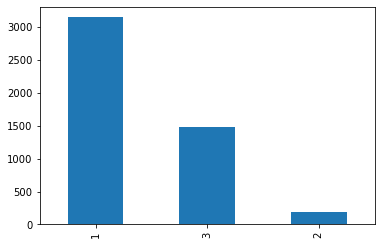

In [7]:
df['CityTier'].value_counts().plot(kind = 'bar')

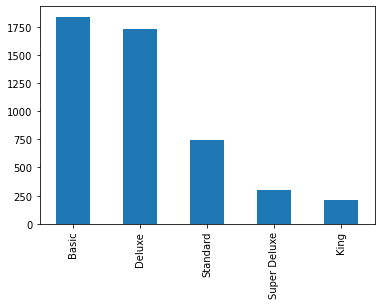

In [8]:
df['ProductPitched'].value_counts().plot(kind = 'bar')

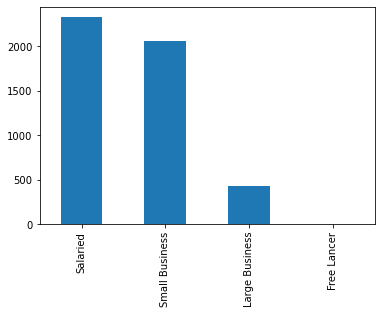

In [9]:
df['Occupation'].value_counts().plot(kind = 'bar')

In [10]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisited',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisited', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [11]:
x_eda = df[['DurationOfPitch','NumberOfPersonVisited','NumberOfFollowups','NumberOfTrips','PitchSatisfactionScore','NumberOfChildrenVisited']]

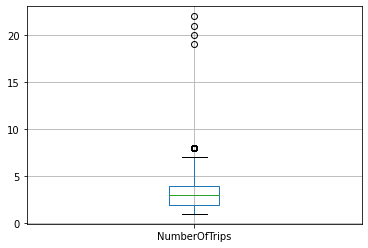

In [12]:
 pd.DataFrame(x_eda['NumberOfTrips']).boxplot()

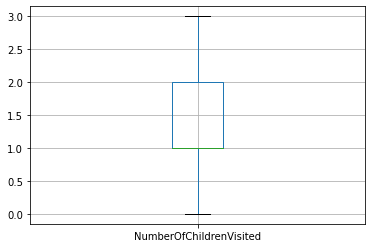

In [13]:
 pd.DataFrame(x_eda['NumberOfChildrenVisited']).boxplot()

In [14]:
x_eda = df[df['DurationOfPitch'] < 50]

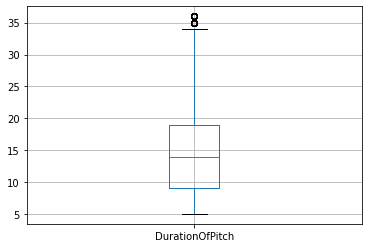

In [15]:
 pd.DataFrame(x_eda['DurationOfPitch']).boxplot()

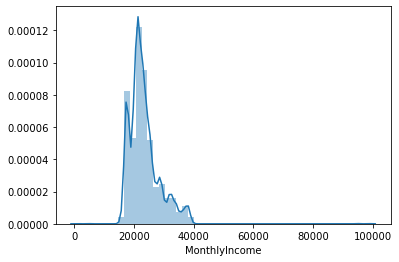

In [16]:
sns.distplot(df['MonthlyIncome'])

In [17]:
df.groupby('Designation')['MonthlyIncome'].mean()

Designation
AVP               31829.913333
Executive         19931.849679
Manager           22636.107460
Senior Manager    26626.846154
VP                35983.401914
Name: MonthlyIncome, dtype: float64

In [18]:
df = df[df['MonthlyIncome'] < 50000]
df = df[df['MonthlyIncome'] > 5000]

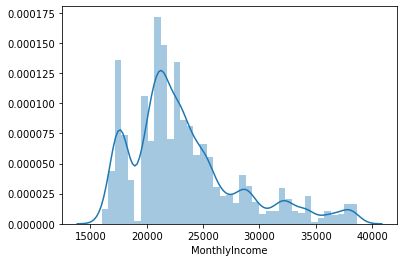

In [19]:
sns.distplot(df['MonthlyIncome'])

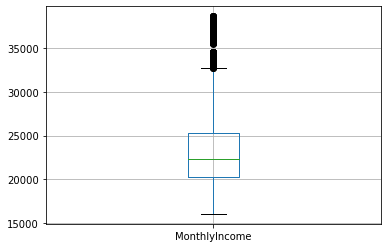

In [20]:
 pd.DataFrame(df['MonthlyIncome']).boxplot()

In [21]:
df.drop('CustomerID', axis = 1, inplace = True)

In [22]:
df.columns

Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisited', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisited', 'Designation', 'MonthlyIncome'],
      dtype='object')

C:\Users\honey\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\honey\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


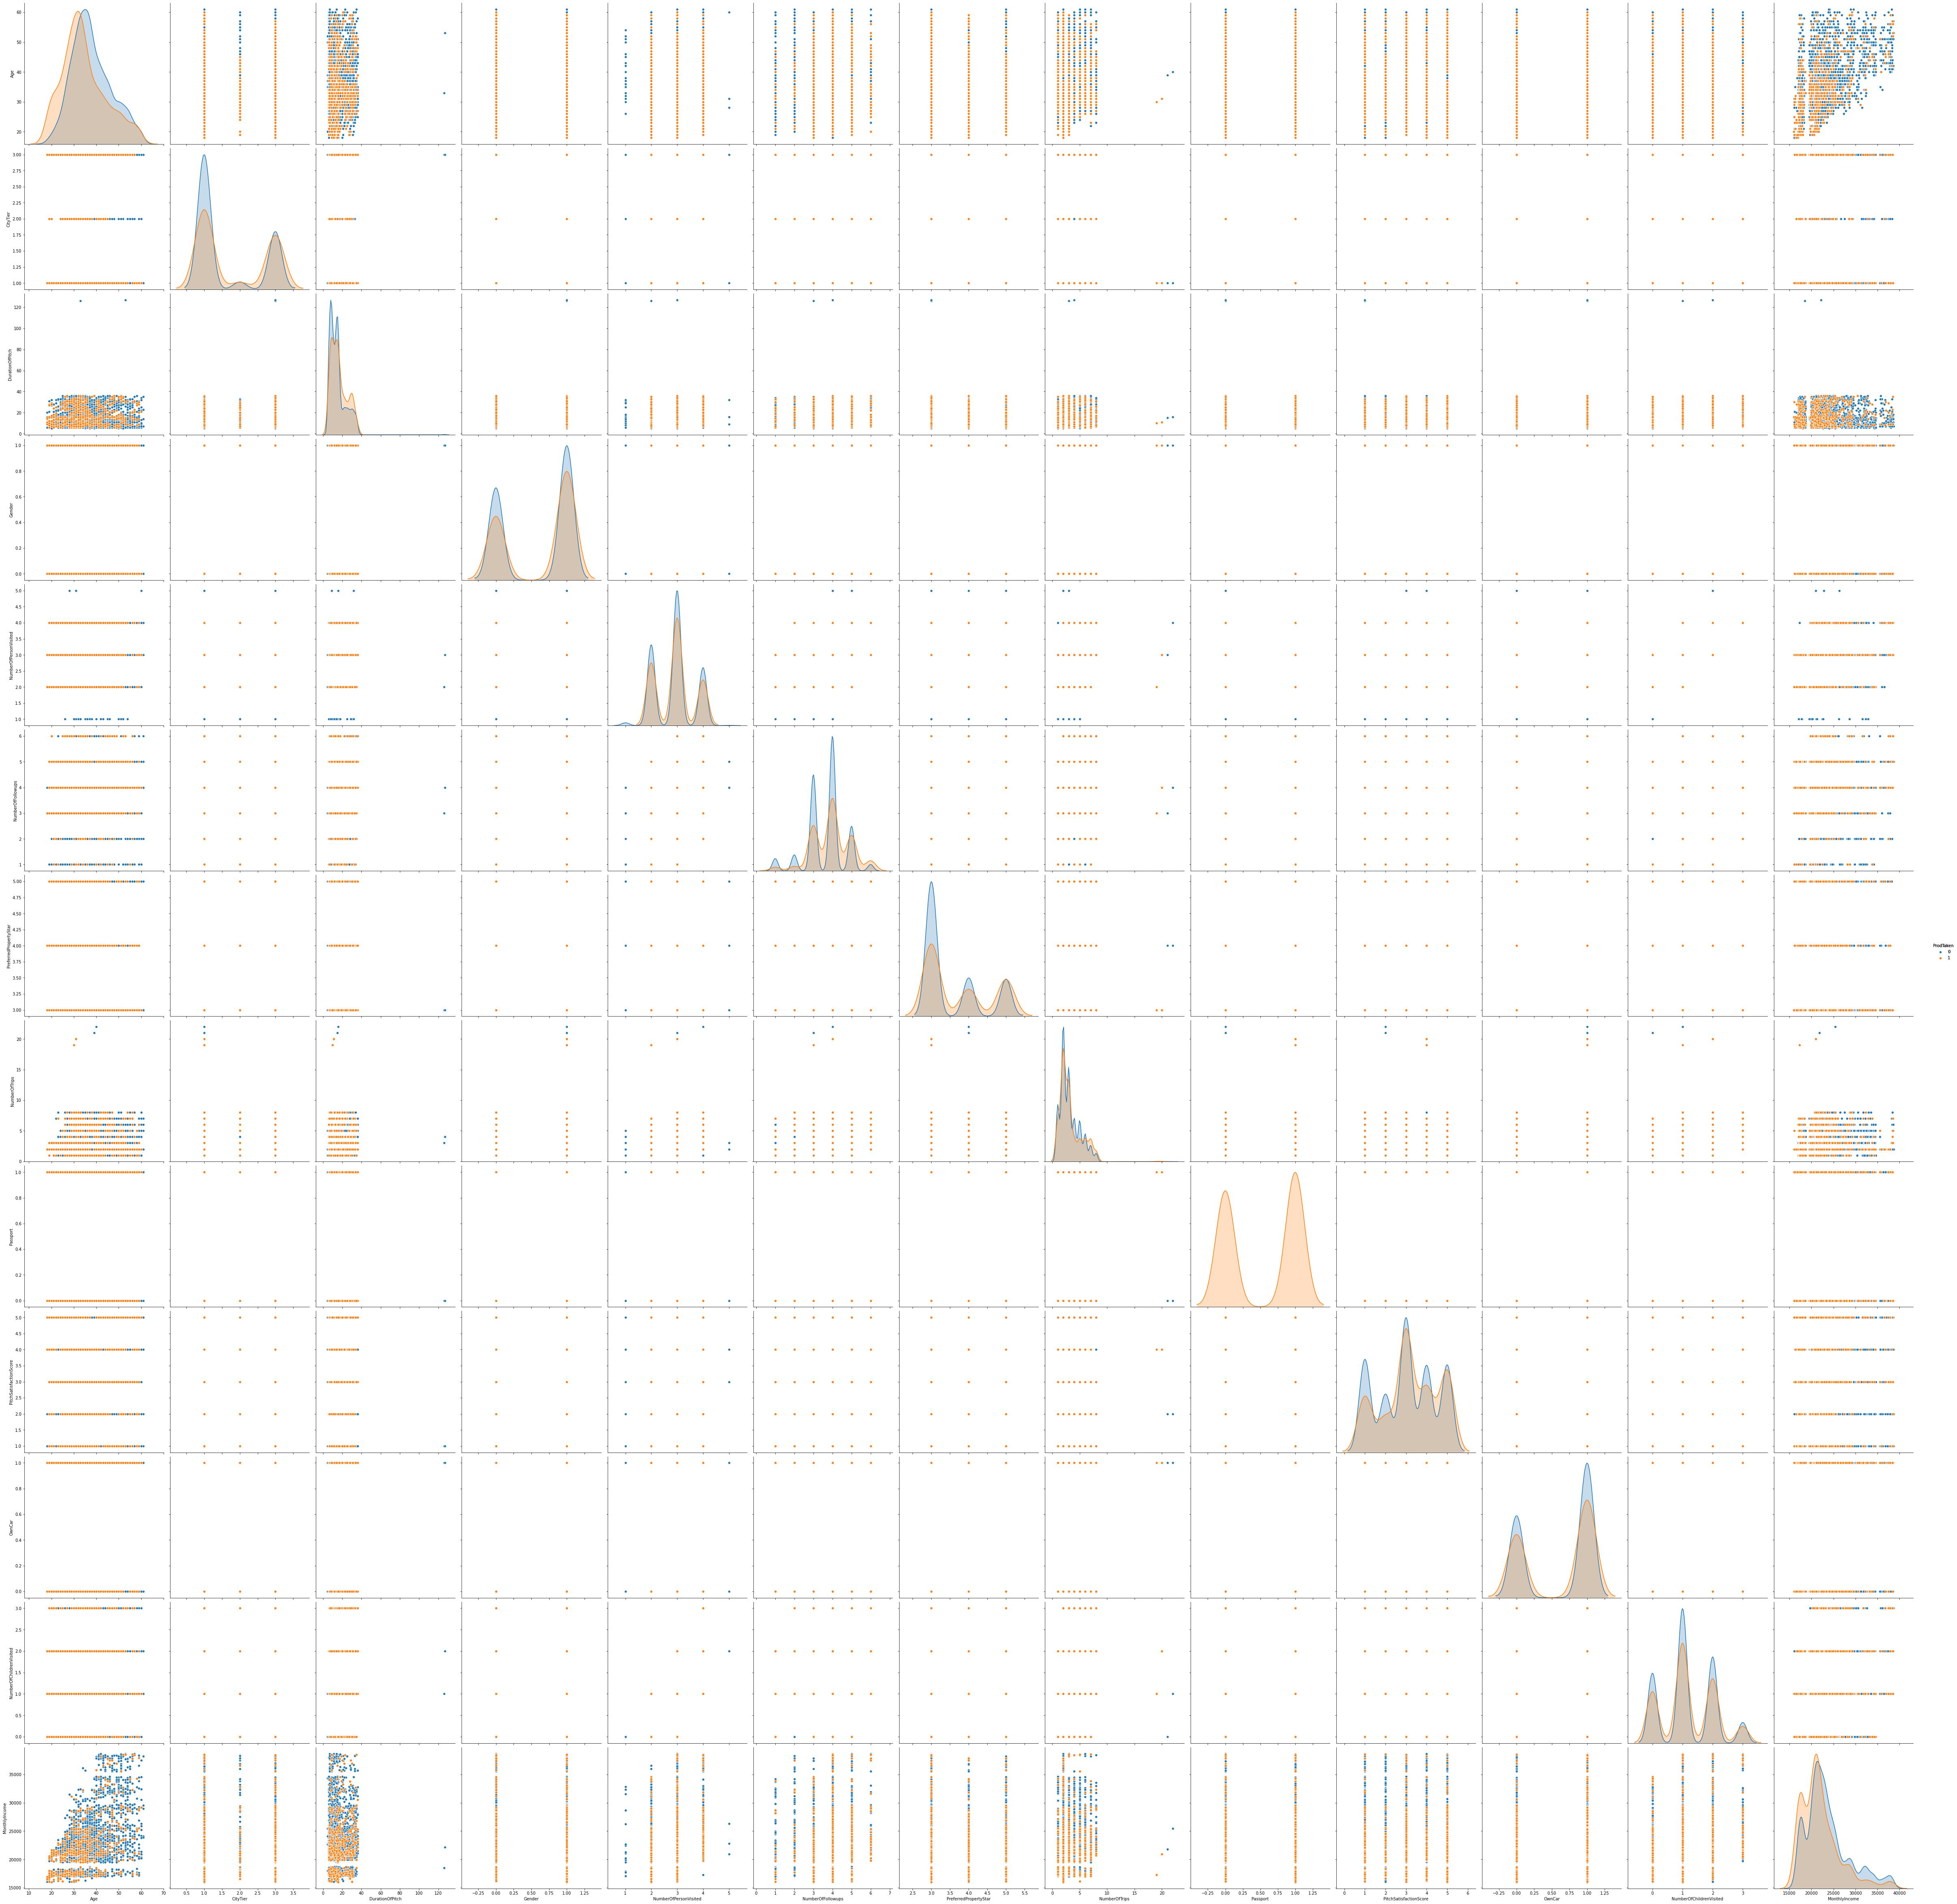

In [23]:
sns.pairplot(df, hue = 'ProdTaken', size = 5).add_legend()

In [24]:
Cor = df.corr()
Cor

,ProdTaken,Age,CityTier,DurationOfPitch,Gender,NumberOfPersonVisited,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,MonthlyIncome
ProdTaken,1.000000,-0.145528,0.086947,0.077460,0.029567,0.012037,0.113855,0.099061,0.025293,0.262108,0.053714,-0.011877,0.007103,-0.130499
Age,-0.145528,1.000000,-0.008617,-0.011206,-0.036099,0.021923,0.003580,-0.025009,0.154377,0.032330,0.013421,0.044561,0.016138,0.476333
CityTier,0.086947,-0.008617,1.000000,0.020370,-0.021384,-0.002616,0.024792,-0.010636,-0.025891,0.002897,-0.043916,0.003343,0.000198,0.063467
DurationOfPitch,0.077460,-0.011206,0.020370,1.000000,0.011324,0.067041,0.011998,-0.006865,0.011868,0.034173,-0.002685,0.002694,0.032615,-0.000474
Gender,0.029567,-0.036099,-0.021384,0.011324,1.000000,-0.006933,-0.003152,-0.025086,-0.002505,-0.036173,0.004794,-0.020153,0.020323,-0.017965
NumberOfPersonVisited,0.012037,0.021923,-0.002616,0.067041,-0.006933,1.000000,0.327285,0.029669,0.177988,0.010519,-0.018946,0.012331,0.610366,0.215662
NumberOfFollowups,0.113855,0.003580,0.024792,0.011998,-0.003152,0.327285,1.000000,-0.026147,0.132753,0.005551,0.001678,0.009905,0.284164,0.180130
PreferredPropertyStar,0.099061,-0.025009,-0.010636,-0.006865,-0.025086,0.029669,-0.026147,1.000000,0.008492,0.002189,-0.024384,0.011553,0.032068,-0.014764
NumberOfTrips,0.025293,0.154377,-0.025891,0.011868,-0.002505,0.177988,0.132753,0.008492,1.000000,0.010248,-0.004440,-0.011678,0.151442,0.075559
Passport,0.262108,0.032330,0.002897,0.034173,-0.036173,0.010519,0.005551,0.002189,0.010248,1.000000,0.001190,-0.021845,0.021332,-0.002492


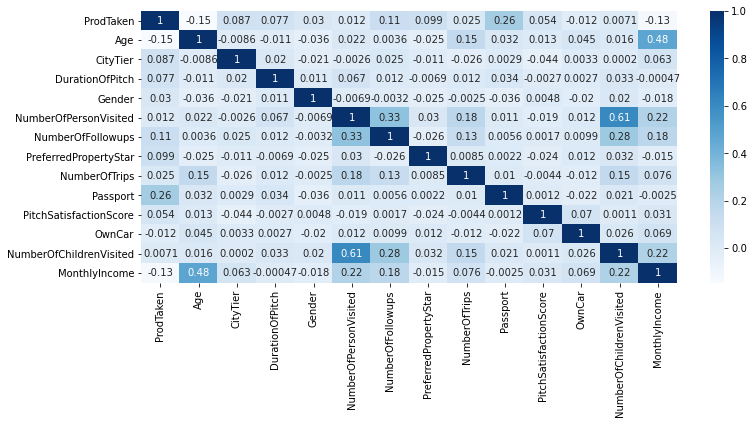

In [25]:
plt.figure(figsize = (12,5))
sns.heatmap(Cor, cmap = 'Blues', annot = True)

In [26]:
pd.pivot_table(df, index = 'DurationOfPitch', columns = 'ProdTaken' , aggfunc= 'mean')

Age             CityTier              Gender            \
ProdTaken                0          1         0         1         0         1   
DurationOfPitch                                                                 
5.000000         38.833333        NaN  1.666667       NaN  0.833333       NaN   
6.000000         38.301887  31.794872  1.475472  1.974359  0.554717  0.564103   
7.000000         38.772414  34.062500  1.482759  2.041667  0.562069  0.604167   
8.000000         39.161172  37.482143  1.644689  1.642857  0.571429  0.660714   
9.000000         38.930052  37.189873  1.704663  1.556962  0.580311  0.658228   
10.000000        37.860104  31.866667  1.683938  1.800000  0.575130  0.733333   
11.000000        37.066667  31.756757  1.696970  1.972973  0.606061  0.810811   
12.000000        37.366460  31.454545  1.540373  1.909091  0.664596  0.666667   
13.000000        39.254054  33.343750  1.470270  1.562500  0.632432  0.625000   
13.914286        34.500000        NaN  2.000000       NaN  0.500000       NaN   
14.000000        38.170616  35.750000  1.691943  1.550000  0.563981  0.675000   
14.759593        34.966387  34.772727  1.747899  1.954545  0.579832  0.772727   
15.000000        37.455814  35.403846  1.618605  1.961538  0.623256  0.653846   
15.570126        36.155844  31.272727  1.701299  2.090909  0.467532  0.545455   
16.000000        36.875576  34.035714  1.658986  1.892857  0.672811  0.607143   
16.271835        22.333333  26.000000  2.333333  3.000000  0.666667  1.000000   
17.000000        37.268966  33.875000  1.800000  1.500000  0.579310  0.416667   
18.000000        37.454545  34.631579  1.563636  2.157895  0.472727  0.368421   
19.000000        36.611111  35.333333  1.555556  2.571429  0.500000  0.571429   
20.000000        38.413043  38.000000  1.695652  2.052632  0.586957  0.631579   
21.000000        38.087719  39.750000  1.596491  1.250000  0.596491  0.625000   
22.000000        35.893939  35.318182  1.575758  1.636364  0.621212  0.590909   
23.000000        37.000000  33.000000  1.589286  1.666667  0.642857  0.380952   
24.000000        38.129630  29.187500  1.388889  1.375000  0.666667  0.437500   
25.000000        39.000000  31.214286  1.350877  2.000000  0.771930  0.714286   
26.000000        37.716667  34.250000  1.533333  2.166667  0.783333  0.666667   
27.000000        38.103448  32.785714  1.793103  2.000000  0.620690  0.428571   
28.000000        37.477273  31.588235  1.772727  1.882353  0.545455  0.705882   
29.000000        37.134615  35.095238  1.384615  1.809524  0.615385  0.571429   
30.000000        37.460317  37.200000  1.317460  1.666667  0.761905  0.700000   
31.000000        39.769231  35.451613  1.346154  1.516129  0.576923  0.741935   
32.000000        39.263158  32.400000  1.789474  1.666667  0.350877  0.600000   
33.000000        38.136364  38.545455  1.840909  3.000000  0.477273  0.272727   
34.000000        37.904762  42.000000  1.666667  3.000000  0.428571  0.428571   
35.000000        39.230769  40.090909  1.769231  1.545455  0.519231  1.000000   
36.000000        39.852941  36.000000  1.588235  1.400000  0.705882  0.800000   
126.000000       33.000000        NaN  3.000000       NaN  1.000000       NaN   
127.000000       53.000000        NaN  3.000000       NaN  1.000000       NaN   

                MonthlyIncome               NumberOfChildrenVisited            \
ProdTaken                   0             1                       0         1   
DurationOfPitch                                                                 
5.000000         26465.526272           NaN                0.500000       NaN   
6.000000         22435.556551  19257.560129                0.769811  0.820513   
7.000000         25475.758353  22633.750000                1.727586  1.687500   
8.000000         22631.052845  20972.730759                0.717949  0.696429   
9.000000         24494.760299  23354.380795                1.388601  1.265823   
10.000000        24503.220911  21888.818778          

In [29]:
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 4210)
df.groupby('OwnCar')['ProdTaken'].value_counts()

OwnCar  ProdTaken
0       0            1478
        1             359
1       0            2427
        1             554
Name: ProdTaken, dtype: int64

C:\Users\honey\anaconda3\lib\site-packages\seaborn\axisgrid.py:2264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


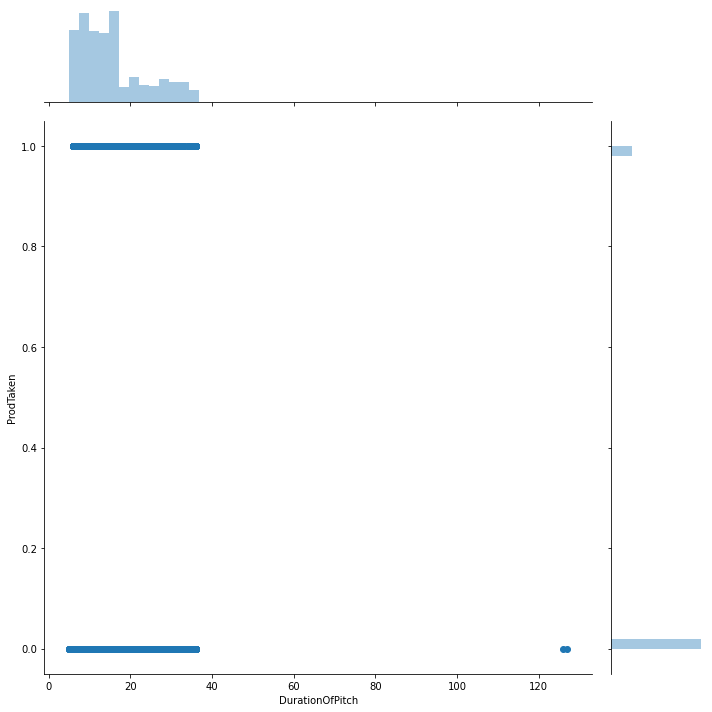

In [28]:
sns.jointplot(data = df, x = 'DurationOfPitch', y = 'ProdTaken', size = 10)